# DATA QUALITY

## IMPORTING PACKAGES

In [2]:
import numpy as np
import pandas as pd
from janitor import clean_names

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_theme(style='dark',palette='pastel')

#To increase autocomplete response speed
%config IPCompleter.greedy=True

## DATA IMPORTATION

In [3]:
project_path = (r'C:\Users\pedro\PEDRO\DS\Portfolio\LEAD_SCORING').replace('\\','/')
data_file_name = 'work.csv'
full_path = project_path + '/02_Data/03_Work/' + data_file_name

In [4]:
df = pd.read_csv(full_path)
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## FORMATTING FEATURE NAMES

### Automatic correction

In [5]:
df = clean_names(df)
df.head(5)

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,...,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Ad hoc correction

Certain features are renamed and sorted to facilitate subsequent work with them.

In [6]:
df.rename(columns={'lead_number':'id',
                   'lead_source':'source',
                   'totalvisits':'total_visits',
                   'total_time_spent_on_website':'total_time_website',
                   'how_did_you_hear_about_x_education':'hear_about',
                   'what_is_your_current_occupation':'ocupation',
                   'what_matters_most_to_you_in_choosing_a_course':'matters_most',
                   'receive_more_updates_about_our_courses':'receive_updates',
                   'update_me_on_supply_chain_content':'update_sc_content',
                   'get_updates_on_dm_content':'update_dm_content',
                   'asymmetrique_activity_index':'activity_index',
                   'asymmetrique_profile_index':'profile_index',
                   'asymmetrique_activity_score':'activity_score',
                   'asymmetrique_profile_score':'profile_score',
                   'i_agree_to_pay_the_amount_through_cheque':'pay_through_cheque',
                   'a_free_copy_of_mastering_the_interview':'lead_magnet'},inplace=True)

In [7]:
df = df.reindex(columns = ['prospect_id',
                           'id',
                           'lead_origin',
                           'source',
                           'do_not_email',
                           'do_not_call',
                           'total_visits',
                           'total_time_website',
                           'page_views_per_visit',
                           'last_activity',
                           'last_notable_activity',
                           'country',
                           'city',
                           'specialization',
                           'ocupation',
                           'hear_about',
                           'matters_most',
                           'search',
                           'magazine',
                           'newspaper_article',
                           'x_education_forums',
                           'newspaper',
                           'digital_advertisement',
                           'through_recommendations',
                           'tags',
                           'receive_updates',
                           'update_sc_content',
                           'update_dm_content',
                           'lead_quality',
                           'lead_profile',
                           'activity_index',
                           'profile_index',
                           'activity_score',
                           'profile_score',
                           'pay_through_cheque',
                           'lead_magnet',
                           'converted'])

## OVERVIEW

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7392 entries, 0 to 7391
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   prospect_id              7392 non-null   object 
 1   id                       7392 non-null   int64  
 2   lead_origin              7392 non-null   object 
 3   source                   7367 non-null   object 
 4   do_not_email             7392 non-null   object 
 5   do_not_call              7392 non-null   object 
 6   total_visits             7279 non-null   float64
 7   total_time_website       7392 non-null   int64  
 8   page_views_per_visit     7279 non-null   float64
 9   last_activity            7308 non-null   object 
 10  last_notable_activity    7392 non-null   object 
 11  country                  5450 non-null   object 
 12  city                     6260 non-null   object 
 13  specialization           6248 non-null   object 
 14  ocupation               

id is set as the dataframe index.

In [8]:
df.set_index('id',inplace=True)

## DATA TYPES

### Identification

In [9]:
df.dtypes

prospect_id                 object
lead_origin                 object
source                      object
do_not_email                object
do_not_call                 object
total_visits               float64
total_time_website           int64
page_views_per_visit       float64
last_activity               object
last_notable_activity       object
country                     object
city                        object
specialization              object
ocupation                   object
hear_about                  object
matters_most                object
search                      object
magazine                    object
newspaper_article           object
x_education_forums          object
newspaper                   object
digital_advertisement       object
through_recommendations     object
tags                        object
receive_updates             object
update_sc_content           object
update_dm_content           object
lead_quality                object
lead_profile        

### Correction

It is obvious that webpages can only be visited an integer number of times, therefore the data type of the variable total_visits is corrected below.

In [9]:
df = df.astype({'total_visits':'Int64'})

## UNIQUE VALUES

### Identification

In [11]:
df.nunique().sort_values()

magazine                      1
pay_through_cheque            1
update_dm_content             1
update_sc_content             1
receive_updates               1
x_education_forums            1
through_recommendations       2
digital_advertisement         2
newspaper                     2
newspaper_article             2
lead_magnet                   2
search                        2
converted                     2
do_not_call                   2
do_not_email                  2
matters_most                  3
profile_index                 3
activity_index                3
lead_origin                   5
lead_quality                  5
lead_profile                  6
ocupation                     6
city                          7
profile_score                10
hear_about                   10
activity_score               12
last_activity                16
last_notable_activity        16
specialization               19
source                       21
tags                         26
country 

### Correction

Features *magazine*, *pay_through_cheque*, *update_dm_content*, *update_sc_content*, *receive_updates* and *x_education_forums* are found to have a unique value, therefore they do not provide any information and should be deleted.

In [10]:
to_delete = ['magazine',
             'pay_through_cheque',
             'update_dm_content',
             'update_sc_content',
             'receive_updates',
             'x_education_forums']

df.drop(columns = to_delete, inplace = True)

## DUPLICATES

### Identification

It is verified that there are no duplicate records in the dataset.

In [11]:
df.duplicated().sum()

0

## NUMERICAL AND CATEGORICAL FEATURES

The original dataset will be split into two subsets of data, categorical and numerical, to facilitate further analysis.

### Categorical

In [12]:
cat = df.select_dtypes(exclude = 'number').copy()

### Numerical

In [13]:
num = df.select_dtypes(include='number').copy()

## CATEGORICAL

### Nulls

#### Identification

In [16]:
nulls = pd.concat([cat.isna().sum().sort_values(ascending = False),cat.apply(lambda x: x.isna().sum()/x.shape).\
                                                               melt(value_name='% Nulls').set_index('variable').\
                                                               sort_values(by='% Nulls',ascending=False)],axis=1).\
       rename(columns = {0:'Nulls'})
nulls

,Nulls,% Nulls
lead_quality,3789,0.512581
profile_index,3358,0.454275
activity_index,3358,0.454275
tags,2658,0.359578
matters_most,2137,0.289096
lead_profile,2137,0.289096
ocupation,2123,0.287202
country,1942,0.262716
hear_about,1739,0.235254
specialization,1144,0.154762


In [17]:
for null in nulls[nulls.Nulls>0].index.to_list():
    print(str(null)+'\n',cat[null].value_counts(dropna=False),'\n')

lead_quality
 NaN                  3789
Might be             1259
Not Sure              875
High in Relevance     524
Worst                 476
Low in Relevance      469
Name: lead_quality, dtype: int64 

profile_index
 NaN          3358
02.Medium    2232
01.High      1775
03.Low         27
Name: profile_index, dtype: int64 

activity_index
 NaN          3358
02.Medium    3081
01.High       653
03.Low        300
Name: activity_index, dtype: int64 

tags
 NaN                                                  2658
Will revert after reading the email                  1671
Ringing                                               979
Interested in other courses                           409
Already a student                                     368
Closed by Horizzon                                    293
switched off                                          200
Busy                                                  142
Lost to EINS                                          137
Not doing further e

##### lead_quality

As this feature is based on the intuition of the the employee who has been assigned to the lead, null values can be imputed with the value Not sure, as some employees are likely to leave this field blank when they are not sure of the lead quality.

##### profile_index and activity_index

It can be seen that there is a high (and identical) number of nulls in both features

In [18]:
cat[['profile_index','activity_index']].apply(lambda x: x.value_counts(dropna=False,normalize=True))

,profile_index,activity_index
NaN,0.454275,0.454275
02.Medium,0.301948,0.416802
01.High,0.240124,0.088339
03.Low,0.003653,0.040584


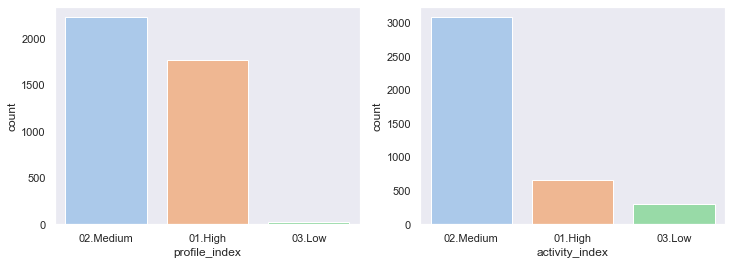

In [19]:
f,ax = plt.subplots(1,2,figsize=(12,4))
sns.countplot(data=cat,x='profile_index',ax=ax[0])
sns.countplot(data=cat,x='activity_index',ax=ax[1]);

The records in which the value of the feature is null are the same for both cases.

In [20]:
cat[(cat.profile_index.isna()==True)&(cat.activity_index.isna()==True)].shape[0]

3358

It is checked if there is any kind of pattern for the cases in which these features are null, since it could be that there is no activity information for these leads, for example. However, it can be seen that the rest of features take differents values, even for the last_activity and last_notable_activity features, so the possible origin of these nulls remains unknown.

Despite having a large number of nulls, these features may be predictive, therefore they will not be eliminated at this stage, and their nulls will be imputed by a new category named *Null*.

In [21]:
cat[(cat.profile_index.isna()==True)&(cat.activity_index.isna()==True)].apply(lambda x: x.nunique())

prospect_id                3358
lead_origin                   3
source                       13
do_not_email                  2
do_not_call                   1
last_activity                14
last_notable_activity        13
country                      26
city                          7
specialization               19
ocupation                     6
hear_about                   10
matters_most                  2
search                        2
newspaper_article             1
newspaper                     2
digital_advertisement         2
through_recommendations       2
tags                         24
lead_quality                  5
lead_profile                  6
activity_index                0
profile_index                 0
lead_magnet                   2
dtype: int64

In [22]:
cat[(cat.profile_index.isna()==True)&(cat.activity_index.isna()==True)][['last_activity','last_notable_activity']].\
                                                                        apply(lambda x: x.value_counts(dropna=False))

,last_activity,last_notable_activity
Converted to Lead,152.0,NaN
Email Bounced,144.0,25.0
Email Link Clicked,81.0,59.0
Email Opened,1143.0,1000.0
Olark Chat Conversation,311.0,71.0
Page Visited on Website,247.0,127.0
SMS Sent,1186.0,1082.0
NaN,35.0,NaN
Form Submitted on Website,26.0,1.0
Unsubscribed,18.0,16.0


##### tags

In this case, there is no obvious cause for the nulls of the feature, since there are categories such as *Ringing*, *number not provided* or *wrong number given*, which include cases in which it has not been possible to contact the lead.


Nulls imputation by the mode (*Will revert after reading the email*) is not an optimal solution since the category *Ringing* has a significant presence too. Therefore, null values will be imputed by a new category named *Untagged*.

In [23]:
cat.tags.value_counts(dropna=False,normalize=True).round(3)

NaN                                                  0.360
Will revert after reading the email                  0.226
Ringing                                              0.132
Interested in other courses                          0.055
Already a student                                    0.050
Closed by Horizzon                                   0.040
switched off                                         0.027
Busy                                                 0.019
Lost to EINS                                         0.019
Not doing further education                          0.015
Graduation in progress                               0.012
Interested  in full time MBA                         0.011
invalid number                                       0.008
Diploma holder (Not Eligible)                        0.007
wrong number given                                   0.005
opp hangup                                           0.004
number not provided                                  0.0

##### matters_most and last_activity

Since the feature *matters_most* comes from a field to be filled in by the lead itself, null values have most likely been generated by the failure to fill in this field, so these null values could be imputed by a new category named "Unknown".

Regarding *last_activity* feature, note that since there are only 1,1% of null values, imputing this nulls by the mode would not imply large errors. However, nulls will be imputed by a new category named *Unknown*.

##### lead_profile, hear_about, specialization and city

Note that the mode of lead_profile feature is *Select*, which is certainly the default value of the field to be filled in by the employee who evaluate each lead. Therefore, the most logical option in this case is to impute null values by the mode (Select).

A similar situation occurs in hear_about, specializtion and city features, where its values should be provided by the lead, having a default value of *Select*. Its nulls will be imputed by the mode (*Select*).

##### ocupation

Given the large difference between the percentage of *Unemployed* leads (60.9%) compared to the percentage of leads belonging to the rest of categories (Working professional 7.7%, Student 2.2%, ...) nulls of this feature will be imputed by the mode (*Unemployed*).

In [24]:
cat.ocupation.value_counts(dropna=False,normalize=True).round(3)

Unemployed              0.609
NaN                     0.287
Working Professional    0.077
Student                 0.023
Other                   0.001
Businessman             0.001
Housewife               0.001
Name: ocupation, dtype: float64

##### country

Given the large difference between the percentage of Indians leads (70.6%) compared to the percentage of leads belonging to the rest of categories (United States 0.76%, United Arab Emirates 0.61%, ...) nulls of this feature will be imputed by the mode (India).

In [25]:
cat.country.value_counts(dropna=False,normalize=True).round(3)

India                   0.706
NaN                     0.263
United States           0.008
United Arab Emirates    0.006
Singapore               0.003
Saudi Arabia            0.002
Australia               0.001
United Kingdom          0.001
Hong Kong               0.001
Qatar                   0.001
France                  0.001
unknown                 0.001
Bahrain                 0.001
Oman                    0.001
Germany                 0.000
Nigeria                 0.000
Sweden                  0.000
Canada                  0.000
Kuwait                  0.000
China                   0.000
Uganda                  0.000
Bangladesh              0.000
South Africa            0.000
Netherlands             0.000
Italy                   0.000
Ghana                   0.000
Belgium                 0.000
Asia/Pacific Region     0.000
Kenya                   0.000
Russia                  0.000
Malaysia                0.000
Liberia                 0.000
Switzerland             0.000
Denmark   

##### source

As Google and Direct Traffic has similar occurrence, imputate nulls by the mode is not an adecuate solution. In this case nulls values will be imputed by a new category named *Null*.

In [26]:
cat.source.value_counts(dropna=False,normalize=True).round(3)

Google               0.309
Direct Traffic       0.277
Olark Chat           0.189
Organic Search       0.127
Reference            0.057
Welingak Website     0.014
Referral Sites       0.014
Facebook             0.006
NaN                  0.003
google               0.000
Click2call           0.000
Press_Release        0.000
bing                 0.000
Social Media         0.000
WeLearn              0.000
Pay per Click Ads    0.000
Live Chat            0.000
welearnblog_Home     0.000
youtubechannel       0.000
testone              0.000
blog                 0.000
NC_EDM               0.000
Name: source, dtype: float64

It can be seen that there are two repeated categories (Google, google) so they will be unified into a single category.

In [14]:
cat.source.replace('google','Google',inplace=True)

#### Correction

##### Deleting features

prospect_id does not provide relevant information, lead_number will be use as the unique identifier of each lead.

In [15]:
cat.drop(columns='prospect_id',inplace=True)

##### Nulls imputation by a value

In [14]:
cat['lead_quality'] = cat['lead_quality'].fillna('Not Sure')

cat[['last_activity','matters_most']] = cat[['last_activity','matters_most']].fillna('Unknown')

var_impute_select = ['lead_profile','hear_about','specialization','city']
cat[var_impute_select] = cat[var_impute_select].fillna('Select')

cat['tags'] = cat['tags'].fillna('Untagged')

cat[['activity_index','profile_index','source']] = cat[['activity_index','profile_index','source']].fillna('Null')

##### Nulls imputation by mode

###### Features to be imputed

In order to manage possible future nulls, the null imputation (by mode) procedure will be also applied to the features which currently has no null values.

In [16]:
var_nonull_impute_mode  = cat.loc[:,~cat.columns.isin(['lead_quality',
                                                       'last_activity',
                                                       'matters_most',
                                                       'lead_profile',
                                                       'hear_about',
                                                       'specialization',
                                                       'city',
                                                       'tags',
                                                       'source',
                                                       'activity_index',
                                                       'profile_index',
                                                       'ocupation',
                                                       'country'])].columns.to_list()

In [17]:
var_impute_mode = ['ocupation','country']

###### Function to impute by mode

In [32]:
def impute_mode(feature):
    return(feature.fillna(feature.mode()[0]))

###### Mode imputation

In [33]:
cat[var_impute_mode+var_nonull_impute_mode] = cat[var_impute_mode+var_nonull_impute_mode].apply(impute_mode)

#### Comprobation

In [34]:
cat.isna().sum()

lead_origin                0
source                     0
do_not_email               0
do_not_call                0
last_activity              0
last_notable_activity      0
country                    0
city                       0
specialization             0
ocupation                  0
hear_about                 0
matters_most               0
search                     0
newspaper_article          0
newspaper                  0
digital_advertisement      0
through_recommendations    0
tags                       0
lead_quality               0
lead_profile               0
activity_index             0
profile_index              0
lead_magnet                0
dtype: int64

### Outliers

#### Atypical categories

##### Function to group atypical categories

In [35]:
def group_atypical_categories(var, treshold=0.01, group_name='Others'):
    frequencies = var.value_counts(normalize=True)
    below_treshold = [each for each in frequencies.loc[frequencies < treshold].index.values]
    groupped_array = np.where(var.isin(below_treshold),group_name,var)
    return(groupped_array)

##### Features to be imputed

Categories of each feature with a presence under 1% will be grouped under a new category named Others.

This process has not been applied to dichotomous features as it does not make sense (it would simply replace the class No with Others). lead_quality feature has also been excluded from this process as it only has one category with frequency under 1.5%.

In [36]:
for null in cat.columns.to_list():
    print(str(null)+'\n',cat[null].value_counts(normalize=True).round(3),'\n')

lead_origin
 Landing Page Submission    0.529
API                        0.389
Lead Add Form              0.075
Lead Import                0.006
Quick Add Form             0.000
Name: lead_origin, dtype: float64 

source
 Google               0.309
Direct Traffic       0.277
Olark Chat           0.189
Organic Search       0.127
Reference            0.057
Welingak Website     0.014
Referral Sites       0.014
Facebook             0.006
Null                 0.003
Click2call           0.000
Press_Release        0.000
bing                 0.000
Social Media         0.000
WeLearn              0.000
Pay per Click Ads    0.000
Live Chat            0.000
welearnblog_Home     0.000
youtubechannel       0.000
testone              0.000
blog                 0.000
NC_EDM               0.000
Name: source, dtype: float64 

do_not_email
 No     0.92
Yes    0.08
Name: do_not_email, dtype: float64 

do_not_call
 No     1.0
Yes    0.0
Name: do_not_call, dtype: float64 

last_activity
 Email Opened       

In [37]:
var_group = ['lead_origin',
             'source',
             'last_activity',
             'last_notable_activity',
             'country',
             'specialization',
             'ocupation',
             'hear_about',
             'matters_most',
             'tags',
             'lead_profile']

##### Apply

In [38]:
for feature in var_group:
    cat[feature] = group_atypical_categories(cat[feature],treshold = 0.01, group_name='Others')

##### Checks and corrections

In [39]:
for feature in cat.columns.to_list():
    print(str(feature)+'\n',cat[feature].value_counts(normalize=True).round(3),'\n')

lead_origin
 Landing Page Submission    0.529
API                        0.389
Lead Add Form              0.075
Others                     0.006
Name: lead_origin, dtype: float64 

source
 Google              0.309
Direct Traffic      0.277
Olark Chat          0.189
Organic Search      0.127
Reference           0.057
Welingak Website    0.014
Referral Sites      0.014
Others              0.012
Name: source, dtype: float64 

do_not_email
 No     0.92
Yes    0.08
Name: do_not_email, dtype: float64 

do_not_call
 No     1.0
Yes    0.0
Name: do_not_call, dtype: float64 

last_activity
 Email Opened                 0.372
SMS Sent                     0.296
Olark Chat Conversation      0.105
Page Visited on Website      0.071
Converted to Lead            0.046
Email Bounced                0.036
Email Link Clicked           0.029
Others                       0.021
Form Submitted on Website    0.013
Unknown                      0.011
Name: last_activity, dtype: float64 

last_notable_activity
 

Since feature hear_about already had a category called Other, both categories (Other and Others) will be groupped under Others. The same process will be applied to 'Others Leads' and 'Others' categories of lead_profile feature.

In [40]:
cat.hear_about.replace('Other','Others',inplace=True)
cat.lead_profile.replace('Others','Other Leads',inplace=True)

## NUMERICAL - MANAGEMENT

### Nulls

#### Identification

In [41]:
num.isna().sum().sort_values(ascending = False)

activity_score          3358
profile_score           3358
total_visits             113
page_views_per_visit     113
total_time_website         0
converted                  0
dtype: int64

It can be seen that activity_score and profile_score have a high and identical number of nulls. Despite having a large number of nulls, these features may be predictive, therefore they will not be eliminated at this stage, and their nulls will be imputed.

In [42]:
num[(num.activity_score.isna()==True)&(num.profile_score.isna()==True)].shape

(3358, 6)

In [43]:
num[(num.activity_score.isna()==True)&(num.profile_score.isna()==True)].apply(lambda x: x.nunique())

total_visits              34
total_time_website      1209
page_views_per_visit      73
activity_score             0
profile_score              0
converted                  2
dtype: int64

The strategy will be to impute the nulls of numerical variables by the mean or median value. Their distributions are plotted below to see which one is the most appropriate strategy.

In view of the results, null values will be imputed by the median value (more conservative strategy).

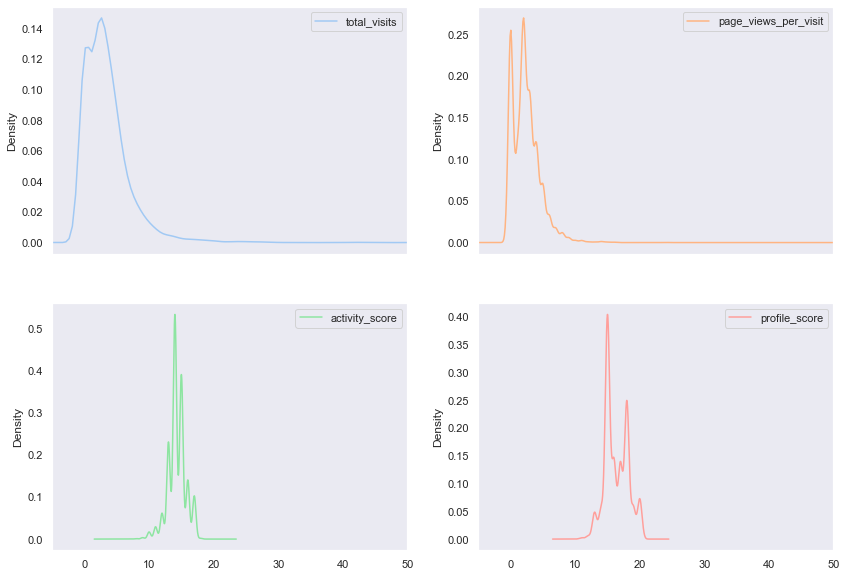

In [22]:
num.loc[:,num.isna().sum()>=1].plot(subplots=True,kind='kde',layout=(2,2),figsize=(14,10));
plt.xlim(-5,50);

#### Correction

##### Null imputation by median

###### Features to be imputed

Note that null imputation (by median) procedure will be also applied to total_time_website (even though it has no nulls in the current dataset, however, it could have nulls in the future once the model is put into production).

In [24]:
var_impute_median = ['total_visits',
                     'total_time_website',
                     'page_views_per_visit',
                     'activity_score',
                     'profile_score']

###### Function to impute by median

In [23]:
def impute_median(feature):
    if pd.api.types.is_integer_dtype(feature):
        return(feature.fillna(int(feature.median())))
    else:
        return(feature.fillna(feature.median()))

###### Impute by median

In [25]:
num[var_impute_median] = num[var_impute_median].apply(impute_median)

### Outliers

####  Identification (by standard deviation)

The adopted criterion is to identify those values that are more than four standard deviations away from the mean.

In [49]:
num_std = 4

###### Function that returns the indexes of the outliers

In [50]:
def find_outliers_index_std(var,n_std=4):
    var = var.dropna()
    treshold = np.std(var)*n_std
    upper_limit = np.mean(var) + treshold
    lower_limit = np.mean(var) - treshold
    ind = [ind for ind,value in var.items() if value<lower_limit or value>upper_limit]
    return(ind)

###### Function that counts the number of outliers

In [51]:
def count_outliers(df, feature, num_std = 4):
    outliers = find_outliers_index_std(df[feature], num_std)
    return(df.loc[outliers,feature].value_counts())

###### Features to check

In [52]:
var_outliers_std = num.columns.to_list()

Identified values:

In [53]:
for feature in var_outliers_std:
    print('\n' + feature + ':\n')
    print(count_outliers(num,feature,num_std))


total_visits:

25     5
27     5
29     2
26     2
43     1
55     1
141    1
74     1
41     1
54     1
115    1
251    1
32     1
28     1
42     1
Name: total_visits, dtype: Int64

total_time_website:

Series([], Name: total_time_website, dtype: int64)

page_views_per_visit:

14.00    8
12.00    5
13.00    4
15.00    4
16.00    3
55.00    1
12.33    1
24.00    1
14.50    1
11.50    1
Name: page_views_per_visit, dtype: int64

activity_score:

10.0    45
9.0      9
8.0      3
7.0      1
Name: activity_score, dtype: int64

profile_score:

Series([], Name: profile_score, dtype: int64)

converted:

Series([], Name: converted, dtype: int64)


**total_visits**: 
- There is only one case that has visited the website 251 times, which is obviously an outlier. 50 visits to the website will be set as the cut-off value for a case to be considered an outlier.

**page_views_per_visit**: 
- 20 pages viewed per visit will be set as the cut-off value for a case to be considered an outlier.

**activity_score**:
- Since it is not known how this variable is calculated, no outlier treatment will be applied to it.

#### Outlier correction by ad hoc winsorisation for total_visits and page_views_per_visit features:

In [59]:
num['total_visits'].clip(0,50, inplace=True)
num['page_views_per_visit'].clip(0,20, inplace=True)

## SAVING DATASETS AFTER DATA QUALITY PROCESSING

Dataframes *df*, *cat* and *num* will be saved once data quality procedures have been applied.

In pickle format so as not to lose metadata modifications.

In [60]:
df = pd.concat([cat,num],axis=1)

### Defining dataset names

In [61]:
path_work = project_path + '/02_Data/03_Work/' + 'work_result_quality.pickle'
path_cat = project_path + '/02_Data/03_Work/' + 'cat_result_quality.pickle'
path_num = project_path + '/02_Data/03_Work/' + 'num_result_quality.pickle'

### Saving datasets

In [62]:
df.to_pickle(path_work)
cat.to_pickle(path_cat)
num.to_pickle(path_num)